
--- IRIS DATASET ---
Iris Dataset Shape: (150, 5)
Accuracy Score (Iris): 1.0


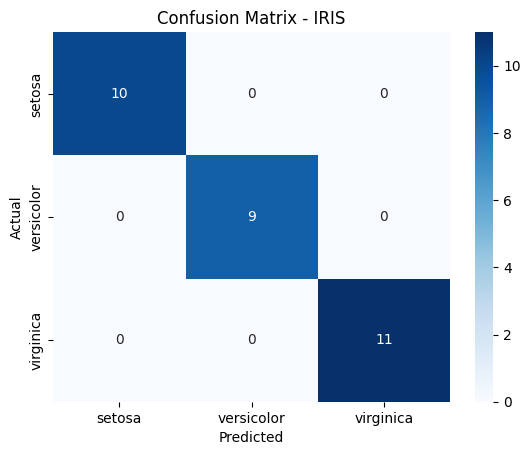


Classification Report (Iris):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. IRIS Dataset KNN Classifier
# -------------------------------
print("\n--- IRIS DATASET ---")

# Load iris dataset
iris = pd.read_csv("iris.csv")
print("Iris Dataset Shape:", iris.shape)

# Features and target
X_iris = iris.drop(columns='species')
y_iris = iris['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Instantiate and train KNN
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_iris.predict(X_test)
print("Accuracy Score (Iris):", accuracy_score(y_test, y_pred))

# Confusion matrix
cm_iris = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues', xticklabels=knn_iris.classes_, yticklabels=knn_iris.classes_)
plt.title("Confusion Matrix - IRIS")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report (Iris):")
print(classification_report(y_test, y_pred))


--- DIABETES DATASET ---
Diabetes Dataset Shape: (768, 9)
Accuracy Score (Diabetes): 0.6948051948051948


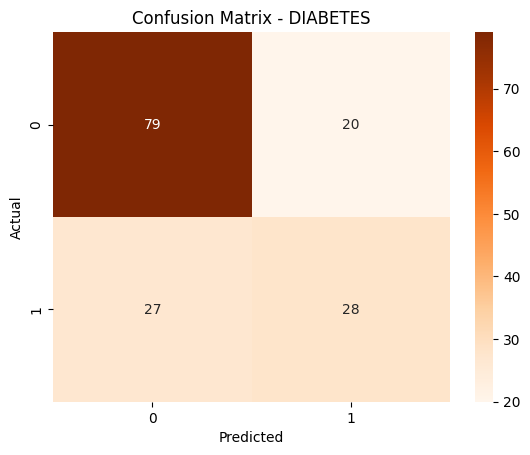


Classification Report (Diabetes):
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [2]:
print("\n--- DIABETES DATASET ---")

# Load diabetes dataset
diabetes = pd.read_csv("diabetes.csv")
print("Diabetes Dataset Shape:", diabetes.shape)

# Features and target
X_diabetes = diabetes.drop(columns='Outcome')
y_diabetes = diabetes['Outcome']

# Split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_d_scaled = scaler.fit_transform(X_train_d)
X_test_d_scaled = scaler.transform(X_test_d)

# Instantiate and train KNN
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train_d_scaled, y_train_d)

# Predict and evaluate
y_pred_d = knn_diabetes.predict(X_test_d_scaled)
print("Accuracy Score (Diabetes):", accuracy_score(y_test_d, y_pred_d))

# Confusion matrix
cm_diabetes = confusion_matrix(y_test_d, y_pred_d)
sns.heatmap(cm_diabetes, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - DIABETES")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report (Diabetes):")
print(classification_report(y_test_d, y_pred_d))

Accuracy: 0.6948051948051948


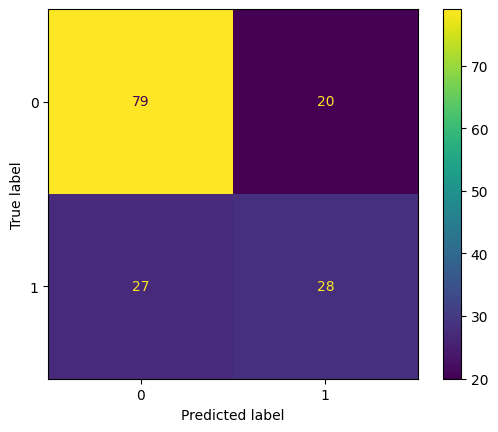

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset (Pima Indians Diabetes Dataset)
# You can use a local file or load from sklearn/dataset
df = pd.read_csv("diabetes.csv")  # Make sure this CSV is in your working directory

# Features and target
X = df.drop("Outcome", axis=1)  # Features
y = df["Outcome"]              # Labels (0 = No diabetes, 1 = Diabetes)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train KNN model (choose k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
